In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

hs_blau = "#22376f"
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#0645ad", "#800020", "#1EB9E7", ])

In [2]:
bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0)

#read sterbefälle pro monat
sterbefälle_monat = pd.read_excel(f"Data\\sonderauswertung-sterbefaelle_groß.xlsx", sheet_name='BL_2016_2022_Monate_AG_Ins') #Datensatz ist selbst zusammengebaut
sterbefälle_monat = sterbefälle_monat[sterbefälle_monat.columns].replace(["-",".","X "],0)
print(sterbefälle_monat.loc[sterbefälle_monat["Bundesland"]=="Baden-Württemberg"][["Bundesland", "Altersgruppe", "Insgesamt"]])

            Bundesland Altersgruppe  Insgesamt
35   Baden-Württemberg    Insgesamt     118703
36   Baden-Württemberg         0-65      15768
37   Baden-Württemberg        65-75      17172
38   Baden-Württemberg        75-85      36168
39   Baden-Württemberg   85 u. mehr      49595
115  Baden-Württemberg    Insgesamt     116006
116  Baden-Württemberg         0-65      14888
117  Baden-Württemberg        65-75      15800
118  Baden-Württemberg        75-85      36901
119  Baden-Württemberg   85 u. mehr      48417
195  Baden-Württemberg    Insgesamt     111582
196  Baden-Württemberg         0-65      14999
197  Baden-Württemberg        65-75      15276
198  Baden-Württemberg        75-85      36159
199  Baden-Württemberg   85 u. mehr      45148
275  Baden-Württemberg    Insgesamt     111134
276  Baden-Württemberg         0-65      15233
277  Baden-Württemberg        65-75      15288
278  Baden-Württemberg        75-85      35858
279  Baden-Württemberg   85 u. mehr      44755
355  Baden-Wü

### Zusammenfassen der Altergruppen für Bundesländer vergleich

In [3]:
bevölkerung

,Jahr,Alter,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Gesamt
1,1990,unter 1 Jahr,119162,136550,41485,29040,6851,16629,62328,23291,83095,199981,43012,11215,49556,31411,29179,28657,911442
2,1990,1-Jährige,114672,129986,38824,31792,6552,15550,60670,25424,79748,192662,41210,10950,53584,33451,28288,30488,893851
3,1990,2-Jährige,116459,130981,39899,34300,6537,15772,60841,27284,81154,195867,42553,11180,56712,36113,28726,33405,917783
4,1990,3-Jährige,110080,124102,38900,35986,6235,14534,58403,29125,77700,188769,41173,10953,59380,37339,27379,34428,894486
5,1990,4-Jährige,109664,123680,37737,35290,6026,13868,56944,28284,76474,184442,40529,10981,58300,36631,26005,34154,879009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,2020,87-Jährige,38312,43512,10243,10105,2244,5301,20549,6791,27702,62723,14619,3985,17717,9317,9953,8377,291450
2849,2020,88-Jährige,33330,38699,8576,8811,1938,4580,18106,6091,24439,55507,12764,3583,15081,8137,8488,7415,255545
2850,2020,89-Jährige,29520,33392,7694,7667,1749,4168,15998,5061,22048,49406,11429,3179,13748,7079,7715,6428,226281
2851,2020,90 Jahre und mehr,108225,122252,30029,26464,7160,17250,62984,16715,83231,184859,43862,10966,51868,24957,29586,23283,843691


### Aufteilung der Altersgruppen pro Bundesland

In [4]:
bundesland = bevölkerung.columns.values.tolist()[2:]
memory = []

for year in range(1990,2021,1):
    #Auswahl der Länder
    bevölkerungs_jahr = bevölkerung.loc[bevölkerung.Jahr== year].reset_index(drop=True)
    for land in bundesland:
        bevölkerung_kleiner_65 =  bevölkerungs_jahr[land].iloc[0:65].sum() # 0-> 64
        memory.append([year,land,(str(0)+" -< "+str(65)), bevölkerung_kleiner_65])
        bevölkerung_kleiner_75 =  bevölkerungs_jahr[land].iloc[65:75].sum() # 65-> 74
        memory.append([year,land,(str(65)+" -< "+str(75)), bevölkerung_kleiner_75])
        bevölkerung_kleiner_85 =  bevölkerungs_jahr[land].iloc[75:85].sum() # 75-> 84
        memory.append([year,land,(str(75)+" -< "+str(85)), bevölkerung_kleiner_85])
        bevölkerung_groesser_85 = bevölkerungs_jahr[land].iloc[85:91].sum() # 85> 74
        memory.append([year,land,(str(85)+"<"), bevölkerung_groesser_85])
        gesamt = bevölkerung_kleiner_65 + bevölkerung_kleiner_75 + bevölkerung_kleiner_85 + bevölkerung_groesser_85
        memory.append([year,land,"Gesamt", gesamt])

new_df = pd.DataFrame(memory, columns=["Jahr","Bundesland","Alter", "Anzahl"])
new_df

,Jahr,Bundesland,Alter,Anzahl
0,1990,Baden-Württemberg,0 -< 65,8417865
1,1990,Baden-Württemberg,65 -< 75,733976
2,1990,Baden-Württemberg,75 -< 85,537443
3,1990,Baden-Württemberg,85<,132743
4,1990,Baden-Württemberg,Gesamt,9822027
...,...,...,...,...
2630,2020,Gesamt,0 -< 65,64883395
2631,2020,Gesamt,65 -< 75,8867174
2632,2020,Gesamt,75 -< 85,6898530
2633,2020,Gesamt,85<,2505932


### Rohe Sterberate

In [5]:
new_df_2020 = new_df.loc[new_df["Jahr"]==2020]
new_df_2020_gesamt = new_df_2020.loc[new_df["Alter"]=="Gesamt"]
new_df_2020_gesamt = new_df_2020_gesamt[:-1]
new_df_2020_gesamt

,Jahr,Bundesland,Alter,Anzahl
2554,2020,Baden-Württemberg,Gesamt,11103043
2559,2020,Bayern,Gesamt,13140183
2564,2020,Berlin,Gesamt,3664088
2569,2020,Brandenburg,Gesamt,2531071
2574,2020,Bremen,Gesamt,680130
2579,2020,Hamburg,Gesamt,1852478
2584,2020,Hessen,Gesamt,6293154
2589,2020,Mecklenburg-Vorpommern,Gesamt,1610774
2594,2020,Niedersachsen,Gesamt,8003421
2599,2020,Nordrhein-Westfalen,Gesamt,17925570


In [ ]:
#print(sterbefälle_monat)
sterbefälle_monat_2020 = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2020) & (sterbefälle_monat["Altersgruppe"]=="Insgesamt")][["Insgesamt", "Bundesland"]].sort_values("Bundesland")
sterbefälle_monat_2020
new_df_2020_gesamt["Todesfaelle"] = sterbefälle_monat_2020["Insgesamt"].to_list()
new_df_2020_gesamt["Rohe_Sterberate"] = (new_df_2020_gesamt["Todesfaelle"]/new_df_2020_gesamt["Anzahl"]) * 100000
new_df_2020_gesamt["delta_zu_gesamtsterberate"] = (new_df_2020_gesamt["Rohe_Sterberate"]) - 1185.2223348940
new_df_2020_gesamt


In [20]:
new_df_2020_gesamt = new_df_2020_gesamt[new_df_2020_gesamt.columns].replace(["Mecklenburg-Vorpommern", "Nordrhein-Westfalen", "Baden-Württemberg","Rheinland-Pfalz","Schleswig-Holstein", ],["MV", "NRW", "BaWü", "RLP","SH" ])
new_df_2020_gesamt

,Jahr,Bundesland,Alter,Anzahl,Todesfaelle,Rohe_Sterberate,delta_zu_gesamtsterberate
0,2020,Hamburg,Gesamt,1852478,18308,988.2978367354,-196.9244981586
1,2020,Berlin,Gesamt,3664088,37642,1027.3224878878,-157.8998470062
2,2020,BaWü,Gesamt,11103043,116006,1044.8126698239,-140.4096650701
3,2020,Bayern,Gesamt,13140183,143367,1091.0578642626,-94.1644706314
4,2020,Hessen,Gesamt,6293154,70051,1113.1302364442,-72.0920984498
5,2020,NRW,Gesamt,17925570,214313,1195.5714657888,10.3491308948
6,2020,Bremen,Gesamt,680130,8151,1198.4473556526,13.2250207586
7,2020,RLP,Gesamt,4098391,49169,1199.7147173122,14.4923824182
8,2020,SH,Gesamt,2910875,35192,1208.9835530554,23.7612181614
9,2020,Niedersachsen,Gesamt,8003421,96980,1211.7318331748,26.5094982808


In [22]:
new_df_2020_gesamt = new_df_2020_gesamt.sort_values(by=["delta_zu_gesamtsterberate"])
new_df_2020_gesamt = new_df_2020_gesamt.reset_index(drop= True)
bundesland_sorted_by_delta = new_df_2020_gesamt["Bundesland"].to_list()


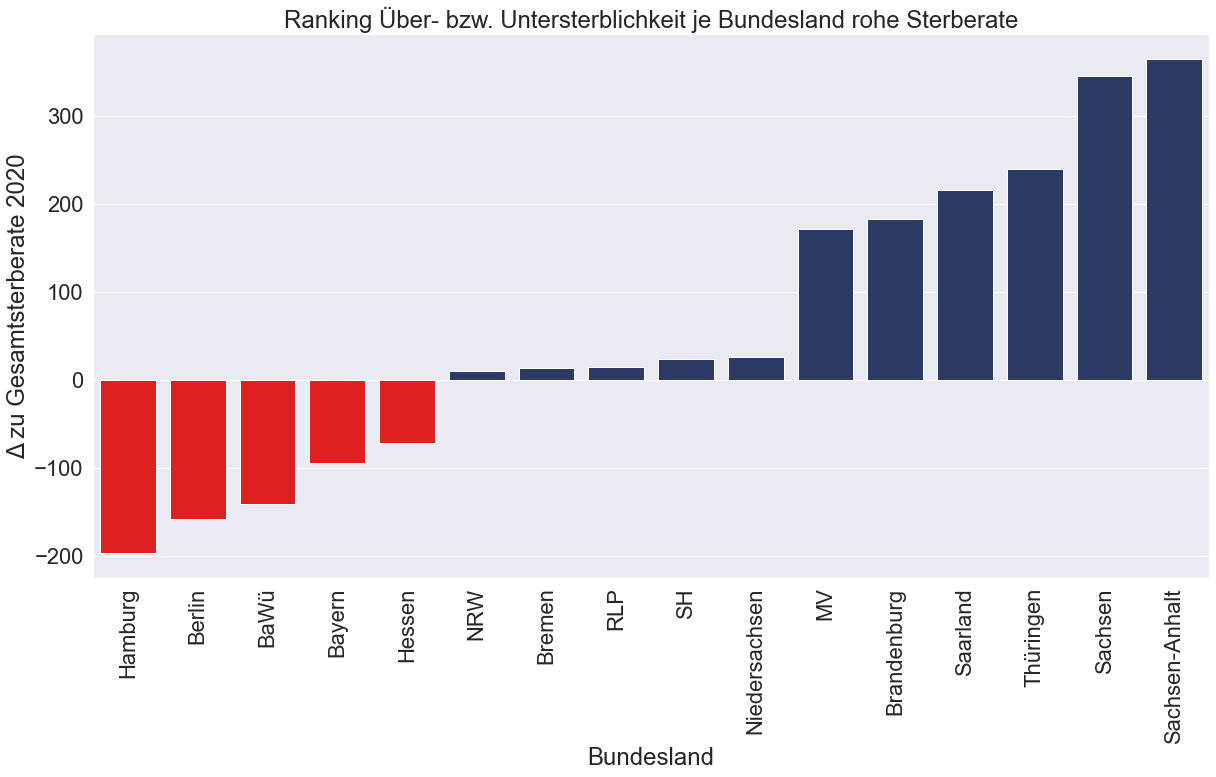

In [84]:
clrs = ['red' if y<=0 else hs_blau for y in new_df_2020_gesamt.delta_zu_gesamtsterberate]


barplot_todesfaelle_sorted = sns.barplot(data = new_df_2020_gesamt, x= new_df_2020_gesamt.Bundesland, y = new_df_2020_gesamt.delta_zu_gesamtsterberate, order= bundesland_sorted_by_delta,  palette=clrs)
sns.set(font_scale=2)



barplot_todesfaelle_sorted.set_ylabel("Δ zu Gesamtsterberate 2020")

barplot_todesfaelle_sorted.set_title("Ranking Über- bzw. Untersterblichkeit je Bundesland rohe Sterberate")
barplot_todesfaelle_sorted.set_xticklabels(barplot_todesfaelle_sorted.get_xticklabels(),rotation = 90)

plt.gcf().set_size_inches(20, 10)

#### Rohe Sterberate für das Jahr 2018 für den Vergleich Sterblichkeiten, um zu schauen ob Sachsen auch dort schlecht abgeschlossen hat.

Das Jahr 2015 konnte auf Grund von fehlenden Daten nicht verwendet werden.

In [35]:
rohe_sterberate_2018 = new_df.loc[new_df["Jahr"]==2018]
rohe_sterberate_2018_gesamt = rohe_sterberate_2018.loc[new_df["Alter"]=="Gesamt"]
rohe_sterberate_2018_gesamt = rohe_sterberate_2018_gesamt[:-1]
rohe_sterberate_2018_gesamt

,Jahr,Bundesland,Alter,Anzahl
2384,2018,Baden-Württemberg,Gesamt,11069533
2389,2018,Bayern,Gesamt,13076721
2394,2018,Berlin,Gesamt,3644826
2399,2018,Brandenburg,Gesamt,2511917
2404,2018,Bremen,Gesamt,682986
2409,2018,Hamburg,Gesamt,1841179
2414,2018,Hessen,Gesamt,6265809
2419,2018,Mecklenburg-Vorpommern,Gesamt,1609675
2424,2018,Niedersachsen,Gesamt,7982448
2429,2018,Nordrhein-Westfalen,Gesamt,17932651


In [36]:
sterbefälle_monat

,Nr.,Jahr,Bundesland,Altersgruppe,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Insgesamt
0,81,2021,Schleswig-Holstein,Insgesamt,3602,3071,3090,2918,2975,2850,2854,2876,2822,3162,3084,3471,36775
1,82,2021,Schleswig-Holstein,0-65,448,411,482,436,436,430,443,394,369,447,391,490,5177
2,83,2021,Schleswig-Holstein,65-75,540,435,487,456,510,433,477,467,454,474,488,536,5757
3,84,2021,Schleswig-Holstein,75-85,1219,1019,1020,952,992,981,912,985,920,1042,994,1070,12106
4,85,2021,Schleswig-Holstein,85 u. mehr,1395,1206,1101,1074,1037,1006,1022,1030,1079,1199,1211,1375,13735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,556,2016,Thüringen,Insgesamt,2576,2488,2571,2293,2344,2136,2179,2143,2178,2342,2419,2643,28312
476,557,2016,Thüringen,0-65,402,406,384,367,366,325,366,345,343,383,399,403,4489
477,558,2016,Thüringen,65-75,394,359,366,361,360,326,347,333,340,361,338,419,4304
478,559,2016,Thüringen,75-85,821,847,906,767,804,732,721,732,767,793,811,897,9598


In [37]:
#print(sterbefälle_monat)
sterbefälle_monat_2018 = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2018) & (sterbefälle_monat["Altersgruppe"]=="Insgesamt")][["Insgesamt", "Bundesland"]].sort_values("Bundesland")
rohe_sterberate_2018_gesamt["Todesfaelle"] = sterbefälle_monat_2018["Insgesamt"].to_list()
rohe_sterberate_2018_gesamt["Rohe_Sterberate"] = (rohe_sterberate_2018_gesamt["Todesfaelle"]/rohe_sterberate_2018_gesamt["Anzahl"]) * 100000
rohe_sterberate_2018_gesamt["delta_zu_gesamtsterberate"] = (rohe_sterberate_2018_gesamt["Rohe_Sterberate"]) - 1185.2223348940
rohe_sterberate_2018_gesamt



,Jahr,Bundesland,Alter,Anzahl,Todesfaelle,Rohe_Sterberate,delta_zu_gesamtsterberate
2384,2018,Baden-Württemberg,Gesamt,11069533,111134,1003.9628591378,-181.2594757562
2389,2018,Bayern,Gesamt,13076721,134809,1030.9082835062,-154.3140513878
2394,2018,Berlin,Gesamt,3644826,35900,984.9578553270,-200.2644795670
2399,2018,Brandenburg,Gesamt,2511917,32684,1301.1576417533,115.9353068593
2404,2018,Bremen,Gesamt,682986,8068,1181.2833645199,-3.9389703741
2409,2018,Hamburg,Gesamt,1841179,18168,986.7590277751,-198.4633071189
2414,2018,Hessen,Gesamt,6265809,67167,1071.9605401314,-113.2617947626
2419,2018,Mecklenburg-Vorpommern,Gesamt,1609675,21948,1363.5050553683,178.2827204743
2424,2018,Niedersachsen,Gesamt,7982448,96165,1204.7056241394,19.4832892454
2429,2018,Nordrhein-Westfalen,Gesamt,17932651,211140,1177.4053931011,-7.8169417929


In [38]:
rohe_sterberate_2018_gesamt = rohe_sterberate_2018_gesamt[rohe_sterberate_2018_gesamt.columns].replace(["Mecklenburg-Vorpommern", "Nordrhein-Westfalen", "Baden-Württemberg","Rheinland-Pfalz","Schleswig-Holstein", ],["MV", "NRW", "BaWü", "RLP","SH" ])
rohe_sterberate_2018_gesamt

,Jahr,Bundesland,Alter,Anzahl,Todesfaelle,Rohe_Sterberate,delta_zu_gesamtsterberate
2384,2018,BaWü,Gesamt,11069533,111134,1003.9628591378,-181.2594757562
2389,2018,Bayern,Gesamt,13076721,134809,1030.9082835062,-154.3140513878
2394,2018,Berlin,Gesamt,3644826,35900,984.9578553270,-200.2644795670
2399,2018,Brandenburg,Gesamt,2511917,32684,1301.1576417533,115.9353068593
2404,2018,Bremen,Gesamt,682986,8068,1181.2833645199,-3.9389703741
2409,2018,Hamburg,Gesamt,1841179,18168,986.7590277751,-198.4633071189
2414,2018,Hessen,Gesamt,6265809,67167,1071.9605401314,-113.2617947626
2419,2018,MV,Gesamt,1609675,21948,1363.5050553683,178.2827204743
2424,2018,Niedersachsen,Gesamt,7982448,96165,1204.7056241394,19.4832892454
2429,2018,NRW,Gesamt,17932651,211140,1177.4053931011,-7.8169417929


In [39]:
rohe_sterberate_2018_gesamt = rohe_sterberate_2018_gesamt.sort_values(by=["delta_zu_gesamtsterberate"])
rohe_sterberate_2018_gesamt = rohe_sterberate_2018_gesamt.reset_index(drop= True)
bundesland_sorted_by_delta_2018 = rohe_sterberate_2018_gesamt["Bundesland"].to_list()


### Plotten mit ranking rohe Sterberaten

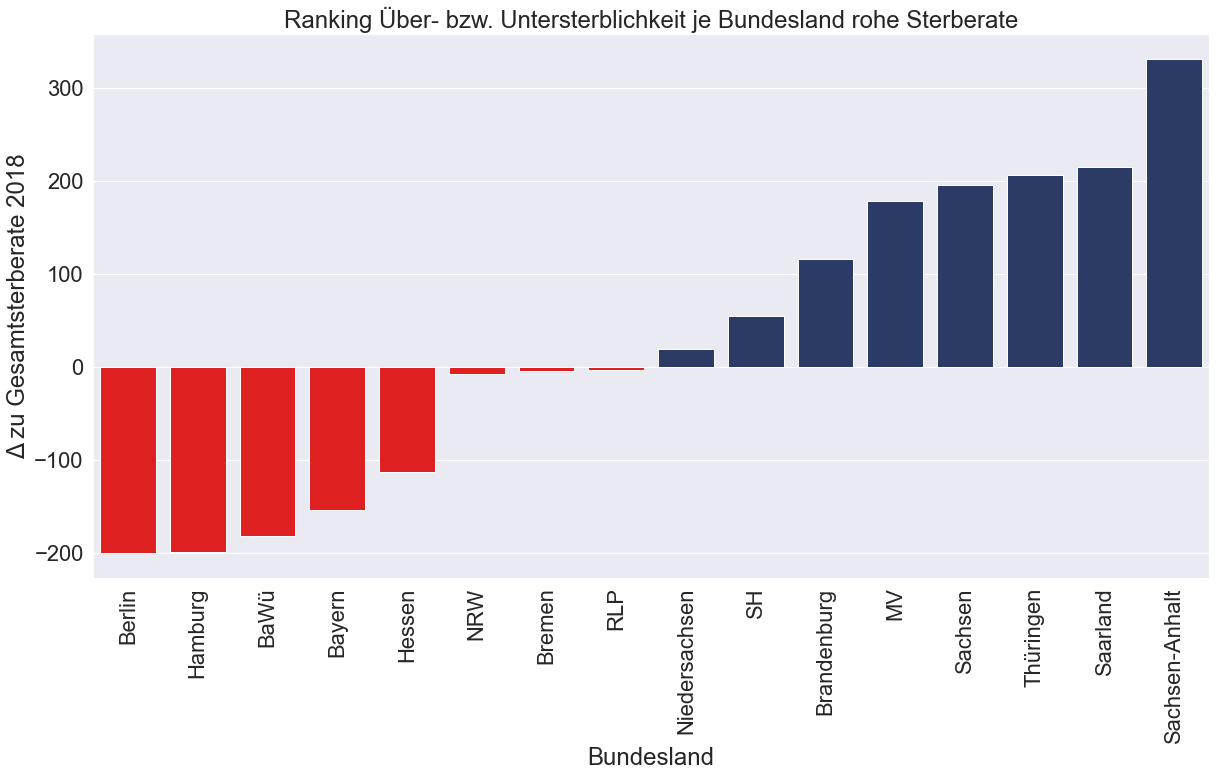

In [83]:
clrs = ['red' if y<=0 else hs_blau for y in rohe_sterberate_2018_gesamt.delta_zu_gesamtsterberate]


barplot_todesfaelle_sorted_2018 = sns.barplot(data = rohe_sterberate_2018_gesamt, x= rohe_sterberate_2018_gesamt.Bundesland, y = rohe_sterberate_2018_gesamt.delta_zu_gesamtsterberate, order= bundesland_sorted_by_delta_2018,  palette=clrs)
sns.set(font_scale=2)



barplot_todesfaelle_sorted_2018.set_ylabel("Δ zu Gesamtsterberate 2018")

barplot_todesfaelle_sorted_2018.set_title("Ranking Über- bzw. Untersterblichkeit je Bundesland rohe Sterberate")
barplot_todesfaelle_sorted_2018.set_xticklabels(barplot_todesfaelle_sorted_2018.get_xticklabels(),rotation = 90)

plt.gcf().set_size_inches(20, 10)

### Altersbereinigung für das Jahr 2020

In [10]:
# list of bundesländer
bundesland_list = ["Schleswig-Holstein", "Hamburg", "Niedersachsen", "Bremen", "Nordrhein-Westfalen", "Hessen", "Rheinland-Pfalz", "Baden-Württemberg", "Bayern",
"Saarland", "Berlin", "Brandenburg", "Mecklenburg-Vorpommern", "Sachsen", "Sachsen-Anhalt", "Thüringen"]

In [11]:
# Standardbevölkerung = Bevölkerung von 2020 aus RLP
standardbev_rlp = new_df.loc[(new_df["Bundesland"]=="Rheinland-Pfalz") & (new_df["Jahr"]==2020)]
standardbev_rlp = standardbev_rlp.reindex(np.roll(standardbev_rlp.index, shift=1)).reset_index(drop=True) #Gesamt auf ersten Platz schieben
print(standardbev_rlp)


   Jahr       Bundesland     Alter   Anzahl
0  2020  Rheinland-Pfalz    Gesamt  4098391
1  2020  Rheinland-Pfalz   0 -< 65  3186030
2  2020  Rheinland-Pfalz  65 -< 75   459450
3  2020  Rheinland-Pfalz  75 -< 85   326464
4  2020  Rheinland-Pfalz       85<   126447


In [12]:
#Sterbefälle nur auf 2020 begrenzen
sterbefälle_monat_2020_age = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2020)].reset_index(drop=True)
sterbefälle_monat_2020_age


,Nr.,Jahr,Bundesland,Altersgruppe,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Insgesamt
0,161,2020,Schleswig-Holstein,Insgesamt,3222,2929,3192,2886,2769,2703,2756,2898,2779,2941,2799,3318,35192
1,162,2020,Schleswig-Holstein,0-65,462,380,466,417,416,413,425,406,388,421,388,414,4996
2,163,2020,Schleswig-Holstein,65-75,495,441,488,436,434,440,442,443,444,499,453,506,5521
3,164,2020,Schleswig-Holstein,75-85,1095,1048,1110,970,948,889,919,1002,946,973,969,1146,12015
4,165,2020,Schleswig-Holstein,85 u. mehr,1170,1060,1128,1063,971,961,970,1047,1001,1048,989,1252,12660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,236,2020,Thüringen,Insgesamt,2619,2432,2632,2544,2273,2198,2261,2290,2290,2440,2588,3659,30226
76,237,2020,Thüringen,0-65,338,331,373,339,323,313,355,321,329,330,332,386,4070
77,238,2020,Thüringen,65-75,394,375,426,397,318,337,360,305,375,380,370,505,4542
78,239,2020,Thüringen,75-85,911,855,888,827,769,744,718,772,769,828,900,1265,10246


In [13]:
#Altersbereinigen

sterberaten_bereinigt = []
gesamt_bev = standardbev_rlp.loc[standardbev_rlp.index[0]]["Anzahl"]

for bundesland in bundesland_list:
    bundesland_df = sterbefälle_monat_2020_age.loc[sterbefälle_monat_2020_age["Bundesland"]==bundesland][["Bundesland", "Altersgruppe", "Insgesamt"]].reset_index(drop=True)
    bevölkerung_je_bundesland = new_df.loc[(new_df["Bundesland"]==bundesland) & (new_df["Jahr"]==2020)].reset_index(drop=True)
    
    erg_sum = 0
    sum = 0

    for j in range(1,5): #loop über Indexe der Altersgruppen, index 0 ist gesamt

        asx = standardbev_rlp.loc[standardbev_rlp.index[j]]["Anzahl"] #bevölkerung je altersgruppe Standardbevölkerung
        sterbefälle_je_grp = bundesland_df.loc[bundesland_df.index[j]]["Insgesamt"] #Sterbefälle je Bevölkerungsgruppe        
        bevölkerung_grp = bevölkerung_je_bundesland.loc[bevölkerung_je_bundesland.index[j-1]]["Anzahl"] #größe Bevölkerungsruppe untersuchte Bevölkerung

        subx = (sterbefälle_je_grp / bevölkerung_grp) * 100000
        sum += (asx * subx)  

    erg = sum / gesamt_bev
    erg_sum += erg  
    
    sterberaten_bereinigt.append([bundesland, erg_sum])

sterberaten_bereinigt = pd.DataFrame(sterberaten_bereinigt, columns=["Bundesland", "Sterberate_bereinigt"])
sterberaten_bereinigt

,Bundesland,Sterberate_bereinigt
0,Schleswig-Holstein,1162.393798
1,Hamburg,1133.872802
2,Niedersachsen,1202.933394
3,Bremen,1224.501773
4,Nordrhein-Westfalen,1215.847526
5,Hessen,1168.574853
6,Rheinland-Pfalz,1199.714717
7,Baden-Württemberg,1098.565018
8,Bayern,1162.658512
9,Saarland,1299.765028


### Abweichung zu Erwartungswert (Sterblichkeit in RLP) hinzufügen

In [14]:
pd.options.display.float_format = '{:.10f}'.format
sterberaten_bereinigt["delta_zu_gesamtsterberate"] = (sterberaten_bereinigt["Sterberate_bereinigt"]) - 1199.714717
print(sterberaten_bereinigt)

                Bundesland  Sterberate_bereinigt  delta_zu_gesamtsterberate
0       Schleswig-Holstein       1162.3937978089             -37.3209191911
1                  Hamburg       1133.8728017884             -65.8419152116
2            Niedersachsen       1202.9333944293               3.2186774293
3                   Bremen       1224.5017731366              24.7870561366
4      Nordrhein-Westfalen       1215.8475263204              16.1328093204
5                   Hessen       1168.5748529377             -31.1398640623
6          Rheinland-Pfalz       1199.7147173122               0.0000003122
7        Baden-Württemberg       1098.5650179978            -101.1496990022
8                   Bayern       1162.6585115914             -37.0562054086
9                 Saarland       1299.7650278979             100.0503108979
10                  Berlin       1156.2239821140             -43.4907348860
11             Brandenburg       1233.9893673974              34.2746503974
12  Mecklenb

### Sortieren nach Abweichung

In [15]:
#Namen kürzen
sterberaten_bereinigt = sterberaten_bereinigt[sterberaten_bereinigt.columns].replace(["Mecklenburg-Vorpommern", "Nordrhein-Westfalen", "Baden-Württemberg","Rheinland-Pfalz","Schleswig-Holstein", ],["MV", "NRW", "BaWü", "RLP","SH" ])

In [16]:
sterberaten_bereinigt = sterberaten_bereinigt.sort_values(by=["delta_zu_gesamtsterberate"])
sterberaten_bereinigt = sterberaten_bereinigt.reset_index(drop= True)
bundesland_sorted_by_delta_altersbereinigt = sterberaten_bereinigt["Bundesland"].to_list()
sterberaten_bereinigt

,Bundesland,Sterberate_bereinigt,delta_zu_gesamtsterberate
0,BaWü,1098.5650179978,-101.1496990022
1,Hamburg,1133.8728017884,-65.8419152116
2,Berlin,1156.2239821140,-43.4907348860
3,SH,1162.3937978089,-37.3209191911
4,Bayern,1162.6585115914,-37.0562054086
5,Hessen,1168.5748529377,-31.1398640623
6,RLP,1199.7147173122,0.0000003122
7,Niedersachsen,1202.9333944293,3.2186774293
8,NRW,1215.8475263204,16.1328093204
9,MV,1221.0604219651,21.3457049651


##### Varianz und Mittelwert bestimmen 2020

In [81]:
# mean sollte ~ 0 sein
mean_delta_2020 = sterberaten_bereinigt.delta_zu_gesamtsterberate.mean()

#Standardabweichung
std_delta_2020 = sterberaten_bereinigt.delta_zu_gesamtsterberate.std()


8.682549726985542


### Plotten mit ranking 2020

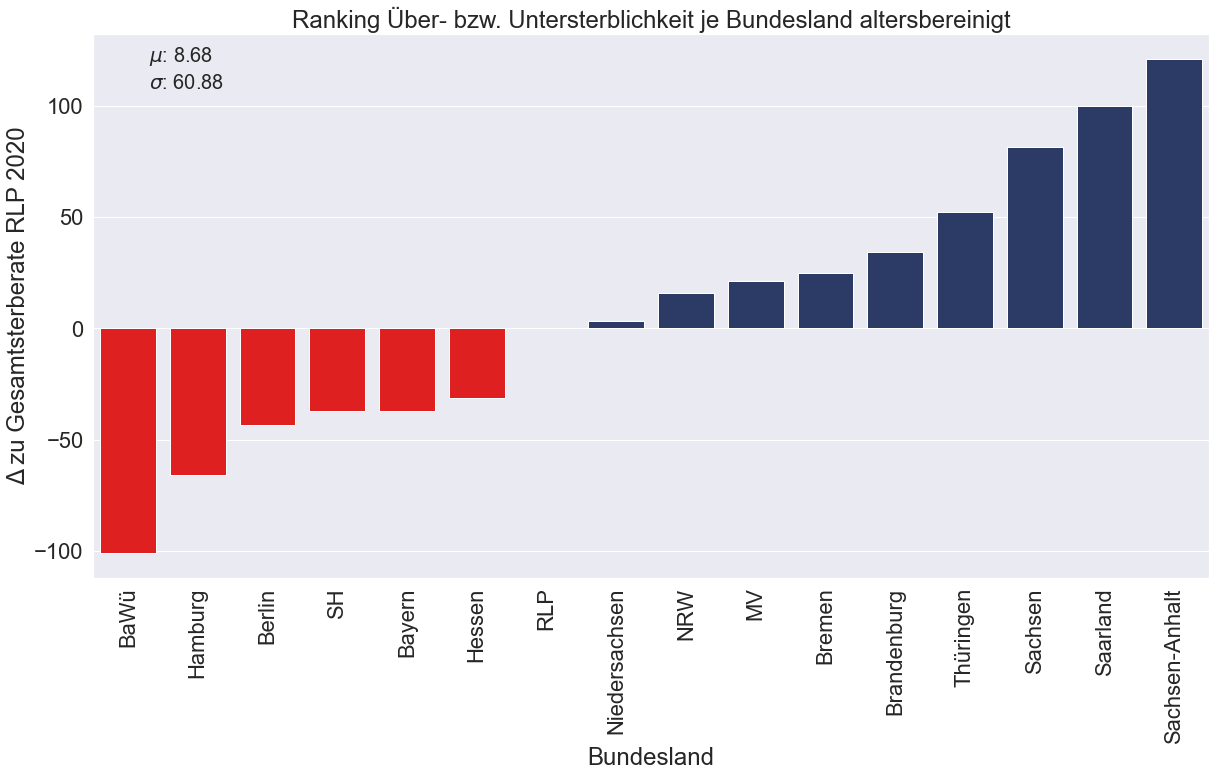

In [82]:
clrs = ['red' if y<=0 else hs_blau for y in sterberaten_bereinigt.delta_zu_gesamtsterberate]


barplot_todesfaelle_sorted_bereinigt = sns.barplot(data = sterberaten_bereinigt, x= sterberaten_bereinigt.Bundesland, y = sterberaten_bereinigt.delta_zu_gesamtsterberate, order= bundesland_sorted_by_delta_altersbereinigt,  palette=clrs)
sns.set(font_scale=2)

barplot_todesfaelle_sorted_bereinigt.axes.annotate(f"$\mu$: {mean_delta_2020:.2f}", xy=(0.05,0.95), xycoords='axes fraction', fontsize = 20)
barplot_todesfaelle_sorted_bereinigt.axes.annotate(f"$\sigma$: {std_delta_2020:.2f}", xy=(0.05,0.9), xycoords='axes fraction', fontsize = 20)

barplot_todesfaelle_sorted_bereinigt.set_ylabel("Δ zu Gesamtsterberate RLP 2020")

barplot_todesfaelle_sorted_bereinigt.set_title("Ranking Über- bzw. Untersterblichkeit je Bundesland altersbereinigt")
barplot_todesfaelle_sorted_bereinigt.set_xticklabels(barplot_todesfaelle_sorted_bereinigt.get_xticklabels(),rotation = 90)

plt.gcf().set_size_inches(20, 10)

### Altersbereinigung für das Jahr 2018

Als Standardbevölkerung wurde die Bevölkerung der Rheinland-Pfalz aus dem Jahre 2018 verwendet.

In [42]:
standardbev_rlp_2018 = new_df.loc[(new_df["Bundesland"]=="Rheinland-Pfalz") & (new_df["Jahr"]==2018)]
standardbev_rlp_2018 = standardbev_rlp_2018.reindex(np.roll(standardbev_rlp_2018.index, shift=1)).reset_index(drop=True) #Gesamt auf ersten Platz schieben
standardbev_rlp_2018


,Jahr,Bundesland,Alter,Anzahl
0,2018,Rheinland-Pfalz,Gesamt,4084844
1,2018,Rheinland-Pfalz,0 -< 65,3197332
2,2018,Rheinland-Pfalz,65 -< 75,426119
3,2018,Rheinland-Pfalz,75 -< 85,345046
4,2018,Rheinland-Pfalz,85<,116347


Sterbefälle nur auf 2018 begrenzen

In [43]:
sterbefälle_monat_2018_age = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2018)].reset_index(drop=True)
sterbefälle_monat_2018_age

,Nr.,Jahr,Bundesland,Altersgruppe,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Insgesamt
0,321,2018,Schleswig-Holstein,Insgesamt,3228,3291,4062,3015,2795,2598,2897,2834,2600,2769,2760,3072,35921
1,322,2018,Schleswig-Holstein,0-65,483,443,517,436,429,401,455,434,406,405,391,435,5235
2,323,2018,Schleswig-Holstein,65-75,478,522,588,473,433,402,465,450,398,431,450,495,5585
3,324,2018,Schleswig-Holstein,75-85,1079,1096,1388,1011,945,923,936,967,871,973,963,1015,12167
4,325,2018,Schleswig-Holstein,85 u. mehr,1188,1230,1569,1095,988,872,1041,983,925,960,956,1127,12934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,396,2018,Thüringen,Insgesamt,2592,2676,3591,2509,2334,2112,2280,2369,2274,2244,2328,2515,29824
76,397,2018,Thüringen,0-65,411,330,453,371,350,337,343,328,371,325,377,330,4326
77,398,2018,Thüringen,65-75,351,435,489,362,337,304,366,375,339,323,340,376,4397
78,399,2018,Thüringen,75-85,905,954,1234,901,819,777,722,870,748,797,804,877,10408


Altersbereinigung für das Jahr 2018

In [54]:
sterberaten_bereinigt_2018 = []
gesamt_bev_2020 = standardbev_rlp.loc[standardbev_rlp.index[0]]["Anzahl"]

for bundesland in bundesland_list:
    bundesland_df_2018 = sterbefälle_monat_2018_age.loc[sterbefälle_monat_2018_age["Bundesland"]==bundesland][["Bundesland", "Altersgruppe", "Insgesamt"]].reset_index(drop=True)
    bevölkerung_je_bundesland_2018 = new_df.loc[(new_df["Bundesland"]==bundesland) & (new_df["Jahr"]==2018)].reset_index(drop=True)
    
    erg_sum_2018 = 0
    sum_2018 = 0

    for j in range(1,5): #loop über Indexe der Altersgruppen, index 0 ist gesamt

        asx_2018 = standardbev_rlp_2018.loc[standardbev_rlp_2018.index[j]]["Anzahl"] #bevölkerung je altersgruppe Standardbevölkerung
        sterbefälle_je_grp_2018 = bundesland_df_2018.loc[bundesland_df_2018.index[j]]["Insgesamt"] #Sterbefälle je Bevölkerungsgruppe        
        bevölkerung_grp_2018 = bevölkerung_je_bundesland_2018.loc[bevölkerung_je_bundesland_2018.index[j-1]]["Anzahl"] #größe Bevölkerungsruppe untersuchte Bevölkerung

        subx_2018 = (sterbefälle_je_grp_2018 / bevölkerung_grp_2018) * 100000
        sum_2018 += (asx_2018 * subx_2018)  

    erg_2018 = sum_2018 / gesamt_bev_2020
    erg_sum_2018 += erg_2018  
    
    sterberaten_bereinigt_2018.append([bundesland, erg_sum_2018])

sterberaten_bereinigt_2018 = pd.DataFrame(sterberaten_bereinigt_2018, columns=["Bundesland", "Sterberate_bereinigt"])
sterberaten_bereinigt_2018

,Bundesland,Sterberate_bereinigt
0,Schleswig-Holstein,1214.3975198085
1,Hamburg,1125.8621533026
2,Niedersachsen,1199.6407382366
3,Bremen,1202.5986551025
4,Nordrhein-Westfalen,1198.2337400435
5,Hessen,1123.0092602798
6,Rheinland-Pfalz,1178.4868744832
7,Baden-Württemberg,1056.6279276549
8,Bayern,1094.5954168417
9,Saarland,1300.1235178800


### Abweichung zu Erwartungswert (Sterblichkeit in RLP) 2018 hinzufügen 

In [64]:
sterberate_rpl_2018 = sterberaten_bereinigt_2018.loc[sterberaten_bereinigt_2018["Bundesland"]=='Rheinland-Pfalz']["Sterberate_bereinigt"]
sterberate_rpl_2018 = float(sterberate_rpl_2018)
sterberate_rpl_2018

1178.4868744831813

In [65]:
# pd.options.display.float_format = '{:.10f}'.format
sterberaten_bereinigt_2018["delta_zu_gesamtsterberate"] = (sterberaten_bereinigt_2018["Sterberate_bereinigt"] - sterberate_rpl_2018)
sterberaten_bereinigt_2018

,Bundesland,Sterberate_bereinigt,delta_zu_gesamtsterberate
0,Schleswig-Holstein,1214.3975198085,35.9106453253
1,Hamburg,1125.8621533026,-52.6247211806
2,Niedersachsen,1199.6407382366,21.1538637534
3,Bremen,1202.5986551025,24.1117806193
4,Nordrhein-Westfalen,1198.2337400435,19.7468655603
5,Hessen,1123.0092602798,-55.4776142034
6,Rheinland-Pfalz,1178.4868744832,0.0000000000
7,Baden-Württemberg,1056.6279276549,-121.8589468283
8,Bayern,1094.5954168417,-83.8914576415
9,Saarland,1300.1235178800,121.6366433968


#### Sortieren nach Abweichung 2018

Bundesländernamen erneut kürzen 

In [68]:
sterberaten_bereinigt_2018 = sterberaten_bereinigt_2018[sterberaten_bereinigt_2018.columns].replace(["Mecklenburg-Vorpommern", "Nordrhein-Westfalen", "Baden-Württemberg","Rheinland-Pfalz","Schleswig-Holstein", ],["MV", "NRW", "BaWü", "RLP","SH" ])
sterberaten_bereinigt_2018

,Bundesland,Sterberate_bereinigt,delta_zu_gesamtsterberate
0,SH,1214.3975198085,35.9106453253
1,Hamburg,1125.8621533026,-52.6247211806
2,Niedersachsen,1199.6407382366,21.1538637534
3,Bremen,1202.5986551025,24.1117806193
4,NRW,1198.2337400435,19.7468655603
5,Hessen,1123.0092602798,-55.4776142034
6,RLP,1178.4868744832,0.0000000000
7,BaWü,1056.6279276549,-121.8589468283
8,Bayern,1094.5954168417,-83.8914576415
9,Saarland,1300.1235178800,121.6366433968


In [71]:
sterberaten_bereinigt_2018 = sterberaten_bereinigt_2018.sort_values(by=["delta_zu_gesamtsterberate"])
sterberaten_bereinigt_2018 = sterberaten_bereinigt_2018.reset_index(drop= True)
bundesland_sorted_by_delta_altersbereinigt_2018 = sterberaten_bereinigt_2018["Bundesland"].to_list()
sterberaten_bereinigt_2018

,Bundesland,Sterberate_bereinigt,delta_zu_gesamtsterberate
0,BaWü,1056.6279276549,-121.8589468283
1,Bayern,1094.5954168417,-83.8914576415
2,Berlin,1119.4171877229,-59.0696867602
3,Hessen,1123.0092602798,-55.4776142034
4,Hamburg,1125.8621533026,-52.6247211806
5,Sachsen,1165.0873592977,-13.3995151855
6,RLP,1178.4868744832,0.0000000000
7,Brandenburg,1195.8263037796,17.3394292965
8,NRW,1198.2337400435,19.7468655603
9,Niedersachsen,1199.6407382366,21.1538637534


##### Varianz und Mittelwert bestimmen 

In [80]:
# mean sollte ~ 0 sein
mean_delta_2018 = sterberaten_bereinigt_2018.delta_zu_gesamtsterberate.mean()

#Standardabweichung
std_delta_2018 = sterberaten_bereinigt_2018.delta_zu_gesamtsterberate.std()


### Plotten mit ranking 2018

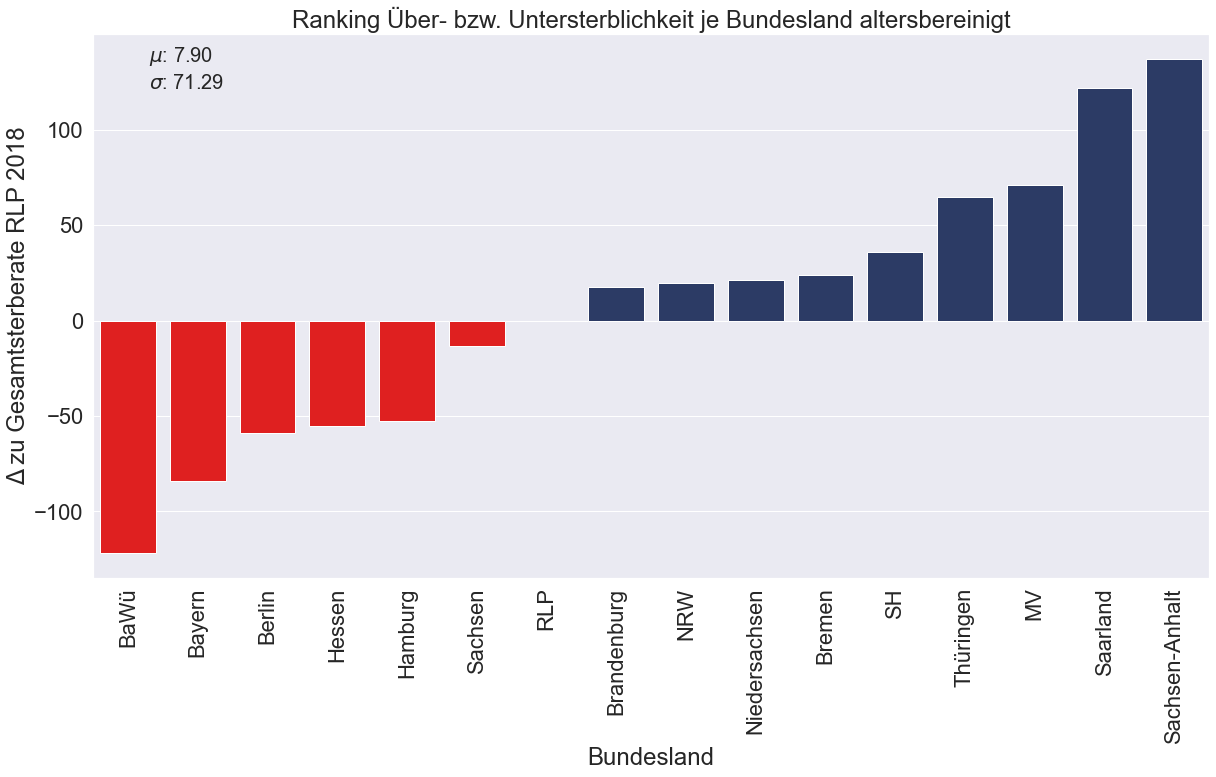

In [77]:
clrs = ['red' if y<=0 else hs_blau for y in sterberaten_bereinigt_2018.delta_zu_gesamtsterberate]


barplot_todesfaelle_sorted_bereinigt_2018 = sns.barplot(data = sterberaten_bereinigt_2018, x= sterberaten_bereinigt_2018.Bundesland, y = sterberaten_bereinigt_2018.delta_zu_gesamtsterberate, order= bundesland_sorted_by_delta_altersbereinigt_2018,  palette=clrs)
sns.set(font_scale=2)

barplot_todesfaelle_sorted_bereinigt_2018.axes.annotate(f"$\mu$: {mean_delta_2018:.2f}", xy=(0.05,0.95), xycoords='axes fraction', fontsize = 20)
barplot_todesfaelle_sorted_bereinigt_2018.axes.annotate(f"$\sigma$: {std_delta_2018:.2f}", xy=(0.05,0.9), xycoords='axes fraction', fontsize = 20)


barplot_todesfaelle_sorted_bereinigt_2018.set_ylabel("Δ zu Gesamtsterberate RLP 2018")
barplot_todesfaelle_sorted_bereinigt_2018.set_title("Ranking Über- bzw. Untersterblichkeit je Bundesland altersbereinigt")
barplot_todesfaelle_sorted_bereinigt_2018.set_xticklabels(barplot_todesfaelle_sorted_bereinigt_2018.get_xticklabels(),rotation = 90)

plt.gcf().set_size_inches(20, 10)